Last Modified: Feb, 25, 2023 [OI]

# Latin hypercube sampling 

In [1]:
import os
import numpy as np
from scipy.stats import qmc

In [24]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=11) 
matplotlib.rc('ytick', labelsize=11) 

In [25]:
# dimensionality setting: number of samples and number of parameters
N = int(100)
d = 9

In [26]:
# sample N of the input parameter.
sampler = qmc.LatinHypercube(d=d)
sample = sampler.random(n=N)

In [27]:
# lower and upper bounds
#          mu0, kappa0, epsilon, k_exp, mu_exp, F_{10.7}, F_{10.7}^{81}, nu_{eddy}, alpha_{eddy}
l_bounds = [1.3E-5, 1.12E-4, 0.05, 0.65, 0.4, -10, -2, 0, 0]
u_bounds = [1.3E-3, 1.12E-3, 0.7, 0.85, 0.6, 10,  2, 1000, 100]

In [28]:
# scale and sample
sample_scaled = qmc.scale(sample=sample,
                     l_bounds=l_bounds,
                     u_bounds=u_bounds)

In [29]:
np.save(file=os.getcwd() + "/test_mfmc_" + str(N), arr=sample_scaled)

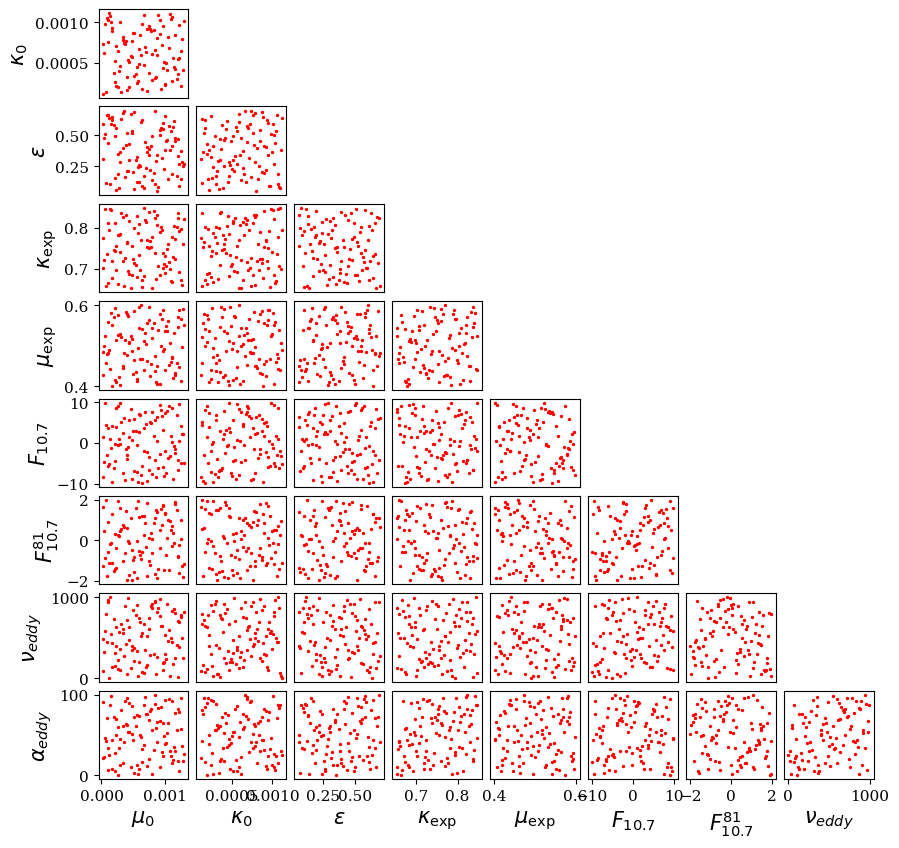

In [32]:
fig, ax = plt.subplots(ncols=d-1, nrows=d-1, figsize=(10, 10))

for jj in range(d-1):
    for ii in range(d-1):
        if jj <= ii:
            ax[ii, jj].scatter(sample_scaled[:, jj], sample_scaled[:, ii+1], s=2, c="r")
            if ii != 7:
                ax[ii, jj].set_xticks([])
            if jj != 0:
                ax[ii, jj].set_yticks([])
        else:
            ax[ii, jj].set_xticks([])
            ax[ii, jj].set_yticks([])
            ax[ii, jj].spines['top'].set_visible(False)
            ax[ii, jj].spines['right'].set_visible(False)
            ax[ii, jj].spines['bottom'].set_visible(False)
            ax[ii, jj].spines['left'].set_visible(False)

ax[-1, 0].set_xlabel(r"$\mu_{0}$")
ax[-1, 1].set_xlabel(r"$\kappa_{0}$")
ax[-1, 2].set_xlabel(r"$\epsilon$")
ax[-1, 3].set_xlabel(r"$\kappa_{\mathrm{exp}}$")
ax[-1, 4].set_xlabel(r"$\mu_{\mathrm{exp}}$")
ax[-1, 5].set_xlabel(r"$F_{10.7}$")
ax[-1, 6].set_xlabel(r"$F_{10.7}^{81}$")
ax[-1, 7].set_xlabel(r"$\nu_{eddy}$")

ax[0, 0].set_ylabel(r"$\kappa_{0}$")
ax[1, 0].set_ylabel(r"$\epsilon$")
ax[2, 0].set_ylabel(r"$\kappa_{\mathrm{exp}}$")
ax[3, 0].set_ylabel(r"$\mu_{\mathrm{exp}}$")
ax[4, 0].set_ylabel(r"$F_{10.7}$")
ax[5, 0].set_ylabel(r"$F_{10.7}^{81}$")
ax[6, 0].set_ylabel(r"$\nu_{eddy}$")
ax[7, 0].set_ylabel(r"$\alpha_{eddy}$")

#fig.suptitle("Random Samples N = " + str(N))
#plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(os.getcwd() + "/random_samples_" + str(N) + ".png", dpi=500)
plt.show()